Fase 1: Exploración y Limpieza
 
1. Exploración Inicial:
- Realiza una exploración inicial de los datos para idenEficar posibles problemas, como valores nulos, atipicos o datos faltantes en las columnas relevantes.
- Utiliza funciones de Pandas para obtener información sobre la estructura de los datos, la presencia de valores nulos y estadísEcas básicas de las columnas involucradas.
- Une los dos conjuntos de datos de la forma más eficiente.

2. Limpieza de Datos:
- Elimina o trata los valores nulos, si los hay, en las columnas clave para asegurar que los datos estén completos.
- Verifica la consistencia y corrección de los datos para asegurarte de que los datos se presenten de forma coherente.
- Realiza cualquier ajuste o conversión necesaria en las columnas (por ejemplo, cambiar tipos de datos) para garantizar la adecuación de los datos para el análisis estadísEco.

In [313]:
# importamos las librerías que necesitamos

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Libreria Regex para buscar patrones
import re

# Imputación de nulos usando métodos avanzados estadísticos
# -----------------------------------------------------------------------
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

# Librerías de visualización
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt
# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

### Fase 1: Exploración y Limpieza : Customer Flight Activity 

In [317]:
# apertura del archivo
df_flight= pd.read_csv("csv/Customer Flight Activity.csv")

pd.set_option('display.max_columns', None)

In [318]:
df_flight.head()

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100018,2017,1,3,0,3,1521,152.0,0,0
1,100102,2017,1,10,4,14,2030,203.0,0,0
2,100140,2017,1,6,0,6,1200,120.0,0,0
3,100214,2017,1,0,0,0,0,0.0,0,0
4,100272,2017,1,0,0,0,0,0.0,0,0


In [319]:
# ultimas 5 filas del data frame
df_flight.tail(5)

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
405619,999902,2018,12,0,0,0,0,0.0,0,0
405620,999911,2018,12,0,0,0,0,0.0,0,0
405621,999940,2018,12,3,0,3,1233,123.0,0,0
405622,999982,2018,12,0,0,0,0,0.0,0,0
405623,999986,2018,12,0,0,0,0,0.0,0,0


In [320]:
 # 10 filas aleatorias del data frame
df_flight.sample(10)

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
360844,418166,2018,10,1,0,1,1686,168.0,0,0
200647,883065,2017,12,0,0,0,0,0.0,0,0
219688,998580,2018,1,3,3,6,1740,174.0,0,0
157928,412203,2017,10,0,0,0,0,0.0,0,0
157853,408378,2017,10,0,0,0,0,0.0,0,0
224833,374113,2018,2,0,0,0,0,0.0,0,0
49752,949974,2017,3,0,0,0,0,0.0,0,0
200569,878909,2017,12,0,0,0,0,0.0,0,0
82031,866307,2017,5,16,8,24,2808,280.0,0,0
114769,809449,2017,7,0,0,0,0,0.0,0,0


In [321]:
# Cantidad de columnas y filas 

print(f"El número de filas que tenemos es {df_flight.shape[0]}, y el número de columnas es {df_flight.shape[1]}")

El número de filas que tenemos es 405624, y el número de columnas es 10


In [322]:
# vemos la informacion general del data frame.
df_flight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405624 entries, 0 to 405623
Data columns (total 10 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               405624 non-null  int64  
 1   Year                         405624 non-null  int64  
 2   Month                        405624 non-null  int64  
 3   Flights Booked               405624 non-null  int64  
 4   Flights with Companions      405624 non-null  int64  
 5   Total Flights                405624 non-null  int64  
 6   Distance                     405624 non-null  int64  
 7   Points Accumulated           405624 non-null  float64
 8   Points Redeemed              405624 non-null  int64  
 9   Dollar Cost Points Redeemed  405624 non-null  int64  
dtypes: float64(1), int64(9)
memory usage: 30.9 MB


In [323]:
# valores nulos totales en cada columna
df_flight.isnull().sum()

Loyalty Number                 0
Year                           0
Month                          0
Flights Booked                 0
Flights with Companions        0
Total Flights                  0
Distance                       0
Points Accumulated             0
Points Redeemed                0
Dollar Cost Points Redeemed    0
dtype: int64

In [325]:
# verificamos duplicados
print(f"El número de filas totales que tenemos es: {df_flight.shape[0]}")
print(f"El número de filas duplicadas que tenemos es: {df_flight.duplicated().sum()}")


El número de filas totales que tenemos es: 405624
El número de filas duplicadas que tenemos es: 1864


In [326]:
# como tenemos duplicados los vamos a filtrar por la variable Loyalty Number
# El parámetro keep=False nos dice que los duplicados que aparezcan sean marcadas como True (si no, solo se marcaría una).

df_duplicados = df_flight[df_flight.duplicated(subset=['Loyalty Number'], keep=False)]

df_duplicados.head(15)


,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100018,2017,1,3,0,3,1521,152.0,0,0
1,100102,2017,1,10,4,14,2030,203.0,0,0
2,100140,2017,1,6,0,6,1200,120.0,0,0
3,100214,2017,1,0,0,0,0,0.0,0,0
4,100272,2017,1,0,0,0,0,0.0,0,0
5,100301,2017,1,0,0,0,0,0.0,0,0
6,100364,2017,1,0,0,0,0,0.0,0,0
7,100380,2017,1,0,0,0,0,0.0,0,0
8,100428,2017,1,6,0,6,606,60.0,0,0
9,100504,2017,1,0,0,0,0,0.0,0,0


In [331]:
# verificamos nombres de columnas

df_flight.columns

Index(['Loyalty Number', 'Year', 'Month', 'Flights Booked',
       'Flights with Companions', 'Total Flights', 'Distance',
       'Points Accumulated', 'Points Redeemed', 'Dollar Cost Points Redeemed'],
      dtype='object')

In [333]:
# resumen de los principales estadisticos
df_flight.describe().round(2)

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
count,405624.00,405624.0,405624.00,405624.00,405624.00,405624.00,405624.00,405624.00,405624.00,405624.00
mean,550037.87,2017.5,6.50,4.12,1.03,5.15,1208.88,123.69,30.70,2.48
std,258935.29,0.5,3.45,5.23,2.08,6.52,1433.16,146.60,125.49,10.15
min,100018.00,2017.0,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,326961.00,2017.0,3.75,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,550834.00,2017.5,6.50,1.00,0.00,1.00,488.00,50.00,0.00,0.00
75%,772194.00,2018.0,9.25,8.00,1.00,10.00,2336.00,239.00,0.00,0.00
max,999986.00,2018.0,12.00,21.00,11.00,32.00,6293.00,676.50,876.00,71.00


##### A) Limpieza Customer Flight Activity

Despues de hacer la exploración comprobamos que:

- No tenemos nulos.
- El tipo de columnas son numericas.
- No se aprecian numeros con valores negativos, aparentemente parecen congruentes.
- Comprobamos que tenemos valores duplicados en la columna Loyalty Number pero no podemos eliminarlos ya que tienen registros para años 2017 y 2018 y separados por meses del 1 al 12 
- Tenemos los nombres de las columnas capitalizadas y con espacios, las pondremos en minusculas y sustituiremos los
   espacios por guiones bajos.

In [335]:

# Guardar el DataFrame en un archivo Excel para explorar mejor los datos
df_flight.to_excel('xls/flight.xlsx')


In [336]:
# Vamos a modificar los nombres de las columnas a minusculas y con guion bajo 
# Esta función utiliza el método rename() de Pandas para renombrar columnas específicas de un DataFrame. 
# Creamos un diccionario (renombrar_columnas) que indica los nombres actuales de las columnas como claves y los nuevos nombres como valores.
renombrar_columnas = {'Loyalty Number': "loyalty_number", 
                      'Year': "year",
                      'Month': "month",
                      'Flights Booked': "flights_booked",
                      'Flights with Companions': "flights_with_companions",
                      'Total Flights': "total_flights", 
                      'Distance': "distance",
                      'Points Accumulated': "points_accumulated", 
                      'Points Redeemed': "points_redeemed",
                      'Dollar Cost Points Redeemed': "dollar_cost_points_redeemed"
                      }

df_flight.rename(columns=renombrar_columnas, inplace=True)

In [337]:
df_flight.columns

Index(['loyalty_number', 'year', 'month', 'flights_booked',
       'flights_with_companions', 'total_flights', 'distance',
       'points_accumulated', 'points_redeemed', 'dollar_cost_points_redeemed'],
      dtype='object')

In [338]:
# comprobamos valores unicos de las columnas
print(f"Los valores únicos de la columna Loyalty Number son: {df_flight['loyalty_number'].unique()}")
print(f"Los valores únicos de la columna Year son: {df_flight['year'].unique()}")
print(f"Los valores únicos de la columna Month son: {df_flight['month'].unique()}")
print(f"Los valores únicos de la columna Flights Booked son: {df_flight['flights_booked'].unique()}")
print(f"Los valores únicos de la columna Flights with Companions son: {df_flight['flights_booked'].unique()}")
print(f"Los valores únicos de la columna Total Flights son: {df_flight['total_flights'].unique()}")
print(f"Los valores únicos de la columna Distance son: {df_flight['distance'].unique()}")
print(f"Los valores únicos de la columna Points Accumulated son: {df_flight['points_accumulated'].unique()}")
print(f"Los valores únicos de la columna Points Redeemed son: {df_flight['points_redeemed'].unique()}")
print(f"Los valores únicos de la columna Dollar Cost Points Redeemedson: {df_flight['dollar_cost_points_redeemed'].unique()}")


Los valores únicos de la columna Loyalty Number son: [100018 100102 100140 ... 999731 999788 999891]
Los valores únicos de la columna Year son: [2017 2018]
Los valores únicos de la columna Month son: [ 1  9  2  3 11  4  5  7  6  8 10 12]
Los valores únicos de la columna Flights Booked son: [ 3 10  6  0  8 11  9  4  7  5  2  1 12 13 14 16 15 17 18 19 20 21]
Los valores únicos de la columna Flights with Companions son: [ 3 10  6  0  8 11  9  4  7  5  2  1 12 13 14 16 15 17 18 19 20 21]
Los valores únicos de la columna Total Flights son: [ 3 14  6  0 15 11 12 10  8  9  7  5 16  2  1 17 13 22  4 19 18 21 26 20
 23 25 27 24 28 30 29 31 32]
Los valores únicos de la columna Distance son: [1521 2030 1200 ... 1217  617 4135]
Los valores únicos de la columna Points Accumulated son: [152.   203.   120.   ...  18.75 601.   626.  ]
Los valores únicos de la columna Points Redeemed son: [  0 341 364 310 445 312 343 366 389 292 447 324 456 409 436 327 322 291
 323 300 290 309 325 386 321 363 340 670 4

In [339]:
df_flight.to_csv('csv/customer_flight_activity_clean.csv', index= False)

### Fase 1: Exploración y Limpieza : Customer Loyalty History 

In [340]:
# apertura del archivo
df_loyalty= pd.read_csv("csv/Customer Loyalty History.csv")

pd.set_option('display.max_columns', None)

In [341]:
df_loyalty.head()

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN
2,429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Single,Star,3839.75,Standard,2014,7,2018.0,1.0
3,608370,Canada,Ontario,Toronto,P1W 1K4,Male,College,NaN,Single,Star,3839.75,Standard,2013,2,NaN,NaN
4,530508,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,103495.0,Married,Star,3842.79,Standard,2014,10,NaN,NaN


In [342]:
df_loyalty.tail()

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
16732,823768,Canada,British Columbia,Vancouver,V6E 3Z3,Female,College,NaN,Married,Star,61850.19,Standard,2012,12,NaN,NaN
16733,680886,Canada,Saskatchewan,Regina,S1J 3C5,Female,Bachelor,89210.0,Married,Star,67907.27,Standard,2014,9,NaN,NaN
16734,776187,Canada,British Columbia,Vancouver,V5R 1W3,Male,College,NaN,Single,Star,74228.52,Standard,2014,3,NaN,NaN
16735,906428,Canada,Yukon,Whitehorse,Y2K 6R0,Male,Bachelor,-57297.0,Married,Star,10018.66,2018 Promotion,2018,4,NaN,NaN
16736,652627,Canada,Manitoba,Winnipeg,R2C 0M5,Female,Bachelor,75049.0,Married,Star,83325.38,Standard,2015,12,2016.0,8.0


In [343]:
df_loyalty.sample(6)

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
16218,656454,Canada,Ontario,Kingston,M9K 2P4,Male,College,NaN,Married,Star,16414.04,Standard,2018,10,NaN,NaN
9680,911723,Canada,Quebec,Quebec City,G1B 3L5,Male,Bachelor,52961.0,Single,Nova,26511.60,Standard,2018,6,NaN,NaN
4450,700225,Canada,Ontario,Sudbury,M5V 1G5,Male,Bachelor,95882.0,Divorced,Nova,2866.82,Standard,2013,11,NaN,NaN
5818,974848,Canada,Quebec,Tremblant,H5Y 2S9,Female,Bachelor,78444.0,Married,Nova,4425.75,Standard,2017,12,NaN,NaN
16513,991050,Canada,Alberta,Banff,T4V 1D4,Female,High School or Below,47587.0,Divorced,Star,24127.50,Standard,2017,1,NaN,NaN
3076,413101,Canada,British Columbia,Vancouver,V6E 3D9,Female,Bachelor,79342.0,Married,Aurora,10298.39,Standard,2013,6,NaN,NaN


In [344]:
# Cantidad de columnas y filas 

print(f"El número de filas que tenemos es {df_loyalty.shape[0]}, y el número de columnas es {df_loyalty.shape[1]}")

El número de filas que tenemos es 16737, y el número de columnas es 16


In [345]:
# vemos la informacion general del data frame.
df_loyalty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16737 entries, 0 to 16736
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Loyalty Number      16737 non-null  int64  
 1   Country             16737 non-null  object 
 2   Province            16737 non-null  object 
 3   City                16737 non-null  object 
 4   Postal Code         16737 non-null  object 
 5   Gender              16737 non-null  object 
 6   Education           16737 non-null  object 
 7   Salary              12499 non-null  float64
 8   Marital Status      16737 non-null  object 
 9   Loyalty Card        16737 non-null  object 
 10  CLV                 16737 non-null  float64
 11  Enrollment Type     16737 non-null  object 
 12  Enrollment Year     16737 non-null  int64  
 13  Enrollment Month    16737 non-null  int64  
 14  Cancellation Year   2067 non-null   float64
 15  Cancellation Month  2067 non-null   float64
dtypes: f

In [346]:
# Comprobamos si hay filas duplicadas en el data frame

df_loyalty.duplicated().sum()

0

In [347]:
# valores nulos totales en cada columna
df_loyalty.isnull().sum()


Loyalty Number            0
Country                   0
Province                  0
City                      0
Postal Code               0
Gender                    0
Education                 0
Salary                 4238
Marital Status            0
Loyalty Card              0
CLV                       0
Enrollment Type           0
Enrollment Year           0
Enrollment Month          0
Cancellation Year     14670
Cancellation Month    14670
dtype: int64

In [348]:
valores_nulos = df_loyalty.isnull().sum()
# Mostrar las columnas con valores nulos
print("Columnas con valores nulos y su conteo:")
print(valores_nulos[valores_nulos > 0])

Columnas con valores nulos y su conteo:
Salary                 4238
Cancellation Year     14670
Cancellation Month    14670
dtype: int64


In [349]:
# se trata de columnas numericas, para poder gestionar los nulo tenemos que ver el porcentaje que tiene cada uno.
# porcentaje de nulos por columnas , lo primero que vamos a hacer es calcular el número de nulos que tenemos en cada una de las columnas
df_nulos = pd.DataFrame((df_loyalty.isnull().sum() / df_loyalty.shape[0]) * 100, columns = ["%_nulos"]).round(2)

# filtramos el DataFrame para quedarnos solo con aquellas columnas que tengan nulos
df_nulos[df_nulos["%_nulos"] > 0]

,%_nulos
Salary,25.32
Cancellation Year,87.65
Cancellation Month,87.65


In [350]:
# guardamos el data frame en un excell para disponer de otra opcion en la exploraracion del archivo

df_loyalty.to_excel('xls/loyalty.xlsx')

##### Conclusiones de la exploracion por columnas:
- ⁠Loyalty_number no hay duplicados, numeros enteros, positivos, informacion correcta.
- ⁠Country,object, sintaxis correcta valor unico Canada
- ⁠Province y City, object, sintaxis correcta.
- Postal Code, object, sintaxis correcta comprobamos en la web que se escriben en mayusculas y con espacio intermedio
- Postal Code, object, sintaxis correcta comprobamos en la web que se escriben en mayusculas y con espacio intermedio
- Gender object, sintaxis correcta comprobamos.
- Salary con un 25.32 % de valores nulos y con valores negativos que seran gestionados
- ⁠Clv no tiene nulos, float y sintaxis correcta.
- ⁠Enrollment Type, no tiene nulos, object sintaxis correcta dos valores unicos dos tipos de inscripcion
- Enrollment Year, entero años 2012 al 2018.
- ⁠Enrollment Month entero de 1 a 12 que son los meses del año
- Cancellation Year con un 87.65 de nulos, pero en este caso este valor significa que son clientes que no cancelaron su membresia en el programa de fidelidad por lo que se mantienen los nulos, lo valores informados indican el año en que si cancelaron la membresia.
- Cancellation Month con el mismo porcentaje de nulos que cancellation year y refleja el mes en los clientes cancelaron la membresia.

Por lo tanto, la limpieza que vamos a tratar aqui:

- nombres de columnas
- nulos de la columna salary


In [351]:
df_loyalty.columns

Index(['Loyalty Number', 'Country', 'Province', 'City', 'Postal Code',
       'Gender', 'Education', 'Salary', 'Marital Status', 'Loyalty Card',
       'CLV', 'Enrollment Type', 'Enrollment Year', 'Enrollment Month',
       'Cancellation Year', 'Cancellation Month'],
      dtype='object')

In [352]:
# # Vamos a modificar los nombres de las columnas a minusculas y con guion bajo 
# Esta función utiliza el método rename() de Pandas para renombrar columnas específicas de un DataFrame. 
# Creamos un diccionario (renombrar_columnas) que indica los nombres actuales de las columnas como claves y los nuevos nombres como valores.
renombrar_columnas = {'Loyalty Number': 'loyalty_number',
                      'Country': 'country',
                      'Province': 'province',
                      'City': 'city',
                      'Postal Code': 'postal_code',
                      'Gender': 'gender',
                      'Education': 'education',
                      'Salary': 'salary',
                      'Marital Status': 'marital_status',
                      'Loyalty Card': 'loyalty_card',
                      'CLV': 'clv', 
                      'Enrollment Type': 'enrollment_type',
                      'Enrollment Year': 'enrollment_year',
                      'Enrollment Month': 'enrollment_month',
                      'Cancellation Year':'cancellation_year',
                      'Cancellation Month': 'cancellation_month'
                      }

df_loyalty.rename(columns=renombrar_columnas, inplace=True)

In [353]:
df_loyalty.columns

Index(['loyalty_number', 'country', 'province', 'city', 'postal_code',
       'gender', 'education', 'salary', 'marital_status', 'loyalty_card',
       'clv', 'enrollment_type', 'enrollment_year', 'enrollment_month',
       'cancellation_year', 'cancellation_month'],
      dtype='object')

In [354]:
df_loyalty['salary'].sort_values()

7373    -58486.0
16735   -57297.0
1082    -49830.0
8767    -49001.0
14327   -47310.0
          ...   
16721        NaN
16727        NaN
16731        NaN
16732        NaN
16734        NaN
Name: salary, Length: 16737, dtype: float64

In [355]:
# Creamos una funcion para cambiar valores negativos utilizamos el metodo .abs()
# El valor absoluto de un número negativo es el mismo número pero sin el signo negativo.

def sustituir_negativos(df, columna):
    df.loc[df["salary"] < 0, columna] = df[columna].abs()  # selecciono solo las filas en las que el valor es negativo y lo convierto a positivo con .abs
    return df

sustituir_negativos(df_loyalty, "salary")

# Comprobamos que ya no tiene negativos
print(df_loyalty["salary"].sort_values())


11635     9081.0
6560     10605.0
1894     12497.0
3243     15609.0
15197    16628.0
          ...   
16721        NaN
16727        NaN
16731        NaN
16732        NaN
16734        NaN
Name: salary, Length: 16737, dtype: float64


In [356]:

df_loyalty.groupby("education")["salary"].count()

education
Bachelor                10475
College                     0
Doctor                    734
High School or Below      782
Master                    508
Name: salary, dtype: int64

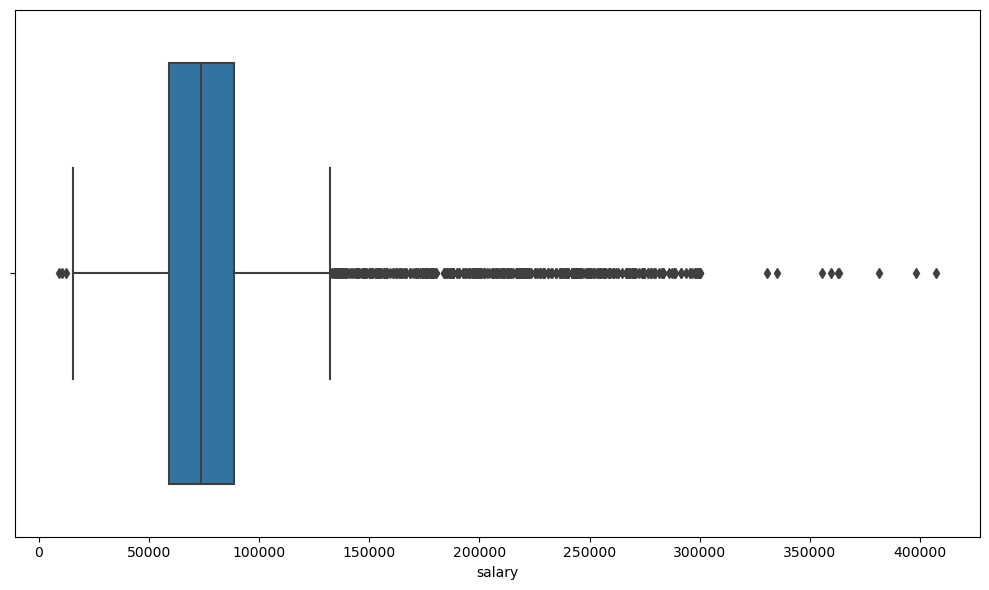

In [357]:
# vamos a comprobar en la columna salary donde tenemos nulos si tenemos valores atipicos mediante una visualizacion
columna_con_nulos = ["salary"]

fig, ax = plt.subplots(figsize = (10,6)) 


for indice, col in enumerate(columna_con_nulos):
    sns.boxplot(x = col, data = df_loyalty, ax = ax)
    
plt.tight_layout()
plt.show()

In [358]:
# para decidir si usamos la media o la mediana hacemos un describe de la columna para saber cuales son estos valores
# comprobamos que la media es mayor que la mediana por lo que se ve afectada por los salarios altos y valores atipicos
# por lo tanto trataremos esos nulos con la mediana
media_salario = df_loyalty["salary"].describe()[["mean", "50%"]].round(2)
media_salario

mean    79359.34
50%     73455.00
Name: salary, dtype: float64

In [359]:
# para seguir analizando y poder imputar los nulos con el metodo mas adecuado vamos a comprobar segun el tipo de educacion 
# cual es el rango salarial en que se mueve.
# el orden de los niveles educativos en canada es el siguiente: 'High School', 'College', ''High School'', 'Master', 'Doctor'
# vemos que el nivel educativo college que es segundo mas bajo no está informado se corresponde con los nulos.
# se encuentra entre 'High School' y 'High School'

df_loyalty.groupby("education")["salary"].count()

education
Bachelor                10475
College                     0
Doctor                    734
High School or Below      782
Master                    508
Name: salary, dtype: int64

In [360]:
# vamos a comprobar el salarios minimo y maximo de cada nivel educativo y su mediana : 
# BACHELOR:

salario_minimo_bachelor = df_loyalty[df_loyalty['education'] == 'Bachelor']['salary'].min()
salario_maximo_bachelor = df_loyalty[df_loyalty["education"] == "Bachelor"]["salary"].max()
print(f"Para bachelor el salario minimo es: {salario_minimo_bachelor} y el maximo es : {salario_maximo_bachelor}")

salario_mediano_bachelor = df_loyalty[df_loyalty['education'] == 'Bachelor']['salary'].median()
salario_promedio_bachelor = df_loyalty[df_loyalty['education'] == 'Bachelor']['salary'].mean().round(2)


Para bachelor el salario minimo es: 9081.0 y el maximo es : 105563.0


In [361]:
# vamos a comprobar el salarios minimo y maximo de cada nivel educativo y su mediana : 
# High School or Below:

salario_minimo_hig_school = df_loyalty[df_loyalty['education'] == 'High School or Below']['salary'].min()
salario_maximo_hig_school = df_loyalty[df_loyalty["education"] == "High School or Below"]["salary"].max()
print(f"Para High School or Below el salario minimo es: {salario_minimo_hig_school} y el maximo es : {salario_maximo_hig_school}")

salario_mediano_hig_school = df_loyalty[df_loyalty['education'] == 'High School or Below']['salary'].median()
salario_promedio_hig_school = df_loyalty[df_loyalty['education'] == 'High School or Below']['salary'].mean().round(2)

Para High School or Below el salario minimo es: 21853.0 y el maximo es : 93875.0


In [362]:
# vamos a comprobar el salarios minimo y maximo de cada nivel educativo y su mediana : 
# MASTER:

salario_minimo_master = df_loyalty[df_loyalty['education'] == 'Master']['salary'].min()
salario_maximo_master = df_loyalty[df_loyalty["education"] == "Master"]["salary"].max()
print(f"Para Master el salario minimo es: {salario_minimo_master} y el maximo es : {salario_maximo_master}")

salario_mediano_master = df_loyalty[df_loyalty['education'] == 'Master']['salary'].median()
salario_promedio_master = df_loyalty[df_loyalty['education'] == 'Master']['salary'].mean().round(2)

Para Master el salario minimo es: 56414.0 y el maximo es : 133080.0


In [363]:
# vamos a comprobar el salarios minimo y maximo de cada nivel educativo y su mediana : 
# DOCTOR:

salario_minimo_doctor = df_loyalty[df_loyalty['education'] == 'Doctor']['salary'].min()
salario_maximo_doctor = df_loyalty[df_loyalty["education"] == "Doctor"]["salary"].max()
print(f"Para Doctor el salario minimo es: {salario_minimo_doctor} y el maximo es : {salario_maximo_doctor}")

salario_mediano_doctor = df_loyalty[df_loyalty['education'] == 'Doctor']['salary'].median()
salario_promedio_doctor = df_loyalty[df_loyalty['education'] == 'Doctor']['salary'].mean().round(2)

Para Doctor el salario minimo es: 48109.0 y el maximo es : 407228.0


In [364]:
print(f"El salario mediano de bachelor es: {salario_mediano_bachelor}")
print(f"El salario promedio de bachelor es: {salario_promedio_bachelor}\n")

print(f"El salario mediano de High School or Below es: {salario_mediano_hig_school}")
print(f"El salario promedio de High School or Below es: {salario_promedio_hig_school}\n")

print(f"El salario mediano de Master es: {salario_mediano_master}")
print(f"El salario promedio de Master es: {salario_promedio_master}\n")

print(f"El salario mediano de Doctor es: {salario_mediano_doctor}")
print(f"El salario promedio de Doctor es: {salario_promedio_doctor}")

El salario mediano de bachelor es: 71960.0
El salario promedio de bachelor es: 72577.25

El salario mediano de High School or Below es: 61915.0
El salario promedio de High School or Below es: 61199.16

El salario mediano de Master es: 105487.0
El salario promedio de Master es: 103757.85

El salario mediano de Doctor es: 182143.5
El salario promedio de Doctor es: 178608.9


In [366]:
# como college a nivel educativo se encuentra entre hig school y bachelor
# vamos a imputar los valores nulos utilizando el promedio de bachelor y  High School or Below 
# primero vamos a filtrar el data frame por bachelor y high school segun su lario y calculamos su promedio conjunto

salario_promedio = df_loyalty[(df_loyalty['education'] == 'Bachelor') | (df_loyalty['education'] == 'High School or Below')]['salary']
salario_promedio.mean().round(2)

71786.84

In [367]:
# como college a nivel educativo se encuentra entre hig school y bachelor
# vamos a imputar los valores nulos de salary utilizando el promedio de l de la mediada de High School or Below es: 61915.0, 
# que es la mas baja teniendo en cuenta que el nivel educativo college es el mas bajo.

salario_promedio = 71786.84

df_loyalty.loc[(df_loyalty["education"] == "College") & df_loyalty["salary"].isnull(), "salary"] = salario_promedio

In [368]:
#comprobamos que la columna salary no tiene nulos

df_loyalty['salary'].isnull().sum()

0

In [369]:
salario_minimo_college = df_loyalty[df_loyalty['education'] == 'College']['salary'].min()
salario_maximo_college = df_loyalty[df_loyalty["education"] == "College"]["salary"].max()
print(f"Para College el salario minimo es: {salario_minimo_college} y el maximo es : {salario_maximo_college}")

Para College el salario minimo es: 71786.84 y el maximo es : 71786.84


In [370]:
# guardamos nuestro nuevo csv 

df_loyalty.to_csv('csv/customer_loyalty_history_clean.csv', index= False)

## UNION
- Vamos a unir los datos para tener la informacion centralizada

In [371]:
# Generamos dos variables para almacenar cada csv.
# Utilizamos el 'inner' para que se incluyan únicamente las filas comunes de ambas tablas

csv_flight = pd.read_csv('csv/customer_flight_activity_clean.csv')
csv_loyalty = pd.read_csv('csv/customer_loyalty_history_clean.csv')

df_unido = pd.merge(csv_flight, csv_loyalty, on='loyalty_number', how='inner')
df_unido.head()

,loyalty_number,year,month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed,country,province,city,postal_code,gender,education,salary,marital_status,loyalty_card,clv,enrollment_type,enrollment_year,enrollment_month,cancellation_year,cancellation_month
0,100018,2017,1,3,0,3,1521,152.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,NaN,NaN
1,100018,2017,2,2,2,4,1320,132.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,NaN,NaN
2,100018,2018,10,6,4,10,3110,311.0,385,31,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,NaN,NaN
3,100018,2017,4,4,0,4,924,92.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,NaN,NaN
4,100018,2017,5,0,0,0,0,0.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,NaN,NaN


In [372]:
# creamos un unico csv unido

df_unido.to_csv('csv/customer_information_airline_merged.csv')